# "Breast Cancer Detection Using Feedforward Neural Network (FNN)"

###  **Problem Statement**
Breast cancer is a leading cause of mortality among women globally. Early detection significantly increases survival rates. The goal of this project is to build a deep learning-based classification model using a Feedforward Neural Network (FNN) to accurately predict whether a tumor is malignant (M) or benign (B) based on various cell nuclei characteristics captured in digitized images of breast masses.

---

### **Business Insights and Use Cases**
* Early Diagnosis: Helps radiologists and oncologists quickly classify breast tumors using model predictions, potentially reducing diagnosis time.

* Resource Allocation: Enables healthcare providers to prioritize high-risk patients for further testing or immediate intervention.

* Cost Reduction: Reduces the need for invasive biopsies by acting as a decision-support tool.

* Public Health Impact: Enhances preventive screening programs with intelligent support tools, improving survival rates and reducing long-term treatment costs.

### **Feature Importance Analysis**
To find which features are most important, we’ll:
* Remove irrelevant features like id and Unnamed: 32 (which is mostly empty).
* Use a feature importance technique (like correlation or model-based importance).
### **Feature Importance Summary**
* The correlation values with the target (diagnosis) show how strongly each feature is related to cancer being malignant (1) or benign (0).

### **Most Important Features (Strong Positive Correlation with Malignancy):**
These features contribute most to identifying malignant tumors:

concave points_worst – 0.79

perimeter_worst – 0.78

concave points_mean – 0.77

radius_worst – 0.77

perimeter_mean – 0.74

area_worst – 0.73

radius_mean – 0.73

area_mean – 0.71

You should definitely include these in your FNN model.

### **Least Important or Irrelevant Features (Low or Negative Correlation):**
These features provide very little signal:

fractal_dimension_mean (−0.01)

texture_se (−0.008)

symmetry_se (−0.006)

smoothness_se (−0.067)

fractal_dimension_se (0.078)

These can potentially be dropped during feature selection to reduce model complexity.

---


## **1. Load Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## **2. Load Data**

In [ ]:
import os #Manually Delete Old Files Before re-uploading, delete any existing files with the same name to prevent renaming:

file_path = "iris.csv"
if os.path.exists(file_path):
    os.remove(file_path)

 #uploaded = files.upload()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving breast cancer.csv to breast cancer.csv
User uploaded file "breast cancer.csv" with length 125204 bytes


In [ ]:
import io
data=pd.read_csv(io.StringIO(uploaded['breast cancer.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

## **3. Data Preprocessing**

### **3.1. Data Cleaning**

In [ ]:
data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
data.drop(columns=["id", "Unnamed: 32"], inplace=True)

In [ ]:
data.shape

(569, 31)

In [ ]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


### **3.2. Handle Duplicates**

In [ ]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

### **3.3. Check inconsistencies and errors**

In [ ]:
# our data have no inconsistencies and errors

### **3.4. Encoding**

In [ ]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Benign 357
Malignanat 212


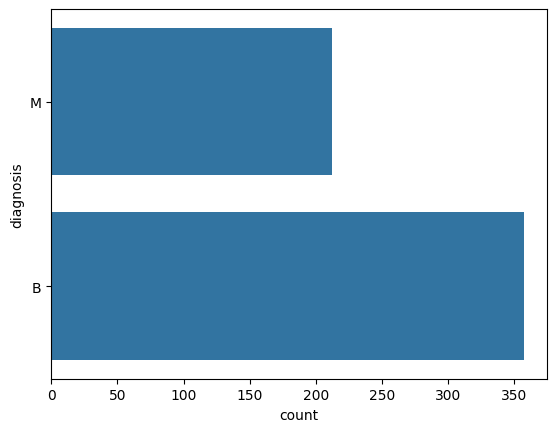

In [ ]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [ ]:
data.dtypes

,0
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


### **3.5. Handle Outliers**

In [ ]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(df):
    outlier_percentages = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(df) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(data)
outlier_percentages_all

{'diagnosis': 0.0,
 'radius_mean': 2.460456942003515,
 'texture_mean': 1.2302284710017575,
 'perimeter_mean': 2.2847100175746924,
 'area_mean': 4.393673110720562,
 'smoothness_mean': 1.054481546572935,
 'compactness_mean': 2.8119507908611596,
 'concavity_mean': 3.163444639718805,
 'concave points_mean': 1.7574692442882252,
 'symmetry_mean': 2.6362038664323375,
 'fractal_dimension_mean': 2.6362038664323375,
 'radius_se': 6.6783831282952555,
 'texture_se': 3.5149384885764503,
 'perimeter_se': 6.6783831282952555,
 'area_se': 11.423550087873462,
 'smoothness_se': 5.272407732864675,
 'compactness_se': 4.92091388400703,
 'concavity_se': 3.8664323374340945,
 'concave points_se': 3.3391915641476277,
 'symmetry_se': 4.745166959578207,
 'fractal_dimension_se': 4.92091388400703,
 'radius_worst': 2.987697715289982,
 'texture_worst': 0.8787346221441126,
 'perimeter_worst': 2.6362038664323375,
 'area_worst': 6.151142355008787,
 'smoothness_worst': 1.2302284710017575,
 'compactness_worst': 2.81195079

In [ ]:
# breast cancer dataset clean and well-balanced dataset, so outlier removal is usually not required.
# If the dataset is small and clean (like the breast cancer dataset), outliers may not have a big effect.
# If you standardize or normalize your data (which you already do with StandardScaler), the effect of outliers can be reduced.



### **3.6. EDA Visualization**

In [ ]:
sns.pairplot(data)
plt.show()

## **4. SCALING**

In [ ]:
data.shape

(569, 31)

In [ ]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
x = data.drop(columns=["diagnosis"])
y = data['diagnosis']

In [ ]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Ensure x_scaled remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
X = pd.DataFrame(x_scaled, columns=data.drop(columns=['diagnosis']).columns)

In [ ]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


## **5. Feature Selection**

In [ ]:
# in this dataset no need to Feature selection

## **6. Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Define the model
model = Sequential()

# Input layer + Hidden Layer 1
model.add(Dense(units=16, input_shape=(30,), activation='relu'))

# Hidden Layer 2
model.add(Dense(units=8, activation='relu'))

# Output Layer (1 class for)
model.add(Dense(units=1, activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7035 - loss: 0.5993
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.3396
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.2190
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.1275
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0950
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.0997
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1003
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0791
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0665
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0600
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0527
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 94.73684210526315


In [ ]:
y_pred.shape

(114, 1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        67
           1       0.89      1.00      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114

[[61  6]
 [ 0 47]]


<Axes: >

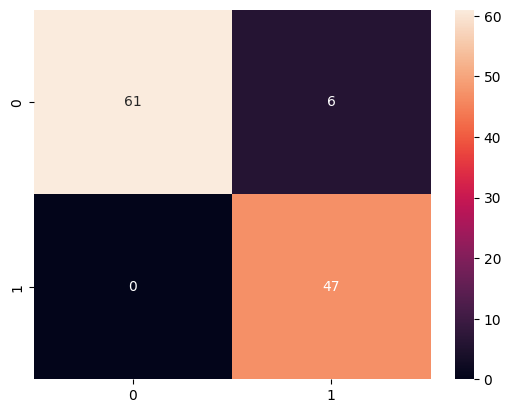

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
(61+47)/114

0.9473684210526315